In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
file_path = 'cleaned_tayara.csv'
df = pd.read_csv(file_path)

In [124]:
# General info
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Check for null values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Région             1503 non-null   object 
 1   Localisation       1503 non-null   object 
 2   Type de bien       1503 non-null   object 
 3   Nature             1461 non-null   object 
 4   Superficie         1503 non-null   float64
 5   Nb_Salles De bain  1503 non-null   float64
 6   Nb_Chambres        1503 non-null   float64
 7   Prix               1503 non-null   float64
dtypes: float64(4), object(4)
memory usage: 94.1+ KB
None
          Superficie  Nb_Salles De bain  Nb_Chambres          Prix
count    1503.000000        1503.000000  1503.000000  1.503000e+03
mean     1236.408162           2.739188     4.434464  5.644187e+05
std     22929.067370          10.643033     5.927845  3.496671e+05
min         0.000000          -3.000000    -1.000000  3.595093e+04
25%       200.000000 

C:\Users\amine\AppData\Local\Temp\ipykernel_9276\3663675870.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Prix'].replace([np.inf, -np.inf], np.nan, inplace=True)


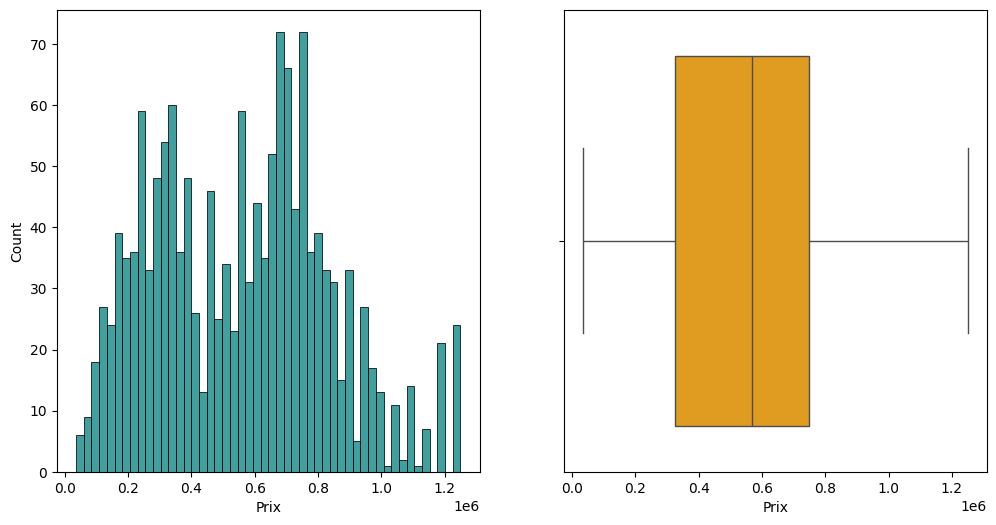

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load cleaned data
df = pd.read_csv('cleaned_tayara.csv')

# Ensure 'Prix' is numeric
df['Prix'] = pd.to_numeric(df['Prix'], errors='coerce')

# Handle NaN and infinite values
df['Prix'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Prix'], inplace=True)

# Cap outliers at 99th percentile
df['Prix'] = df['Prix'].clip(upper=df['Prix'].quantile(0.99))


plt.figure(figsize=(12, 6))

# Histogram for 'Prix'
plt.subplot(1, 2, 1)
sns.histplot(df['Prix'], kde=False, color='teal', bins=50)

# Boxplot for 'Prix'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Prix'], color='orange')

plt.show()


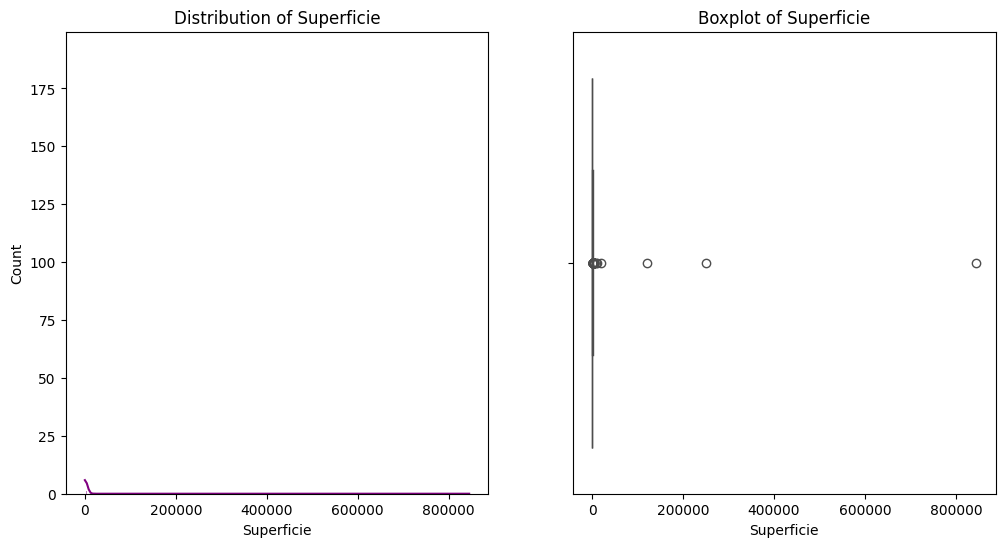

In [126]:
plt.figure(figsize=(12, 6))

# Histogram for 'Superficie'
plt.subplot(1, 2, 1)
sns.histplot(df['Superficie'], kde=True, color='purple')
plt.title('Distribution of Superficie')

# Boxplot for 'Superficie'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Superficie'], color='lime')
plt.title('Boxplot of Superficie')

plt.show()


C:\Users\amine\AppData\Local\Temp\ipykernel_9276\3465563450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type de bien', data=df, palette='viridis')


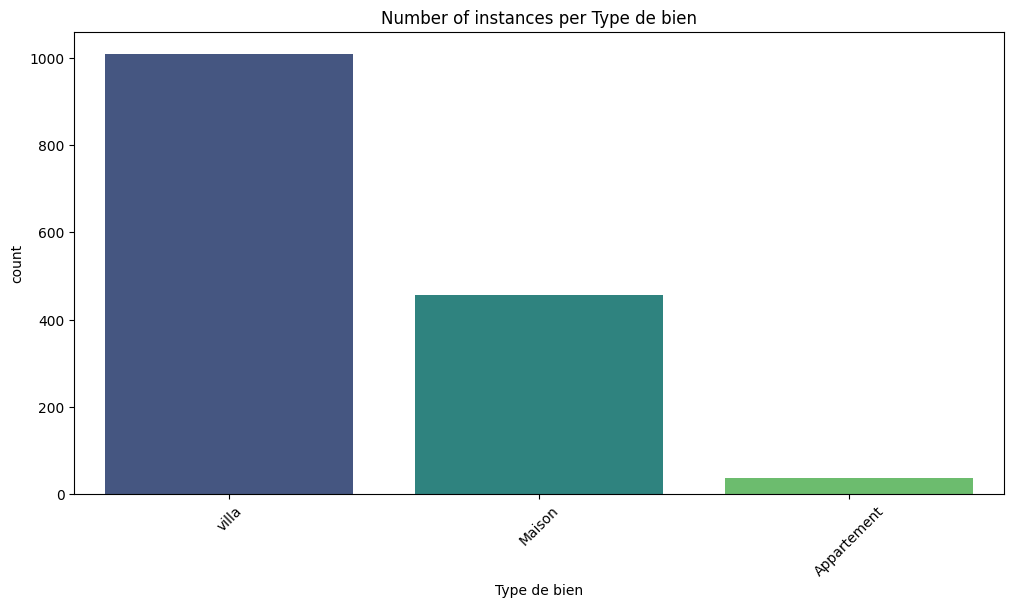

In [127]:
#number of instance of each type de bien 
plt.figure(figsize=(12, 6))
sns.countplot(x='Type de bien', data=df, palette='viridis')
plt.title('Number of instances per Type de bien')
plt.xticks(rotation=45)
plt.show()

C:\Users\amine\AppData\Local\Temp\ipykernel_9276\988289300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Localisation', data=df, palette='viridis', order=df['Localisation'].value_counts().index[:10])


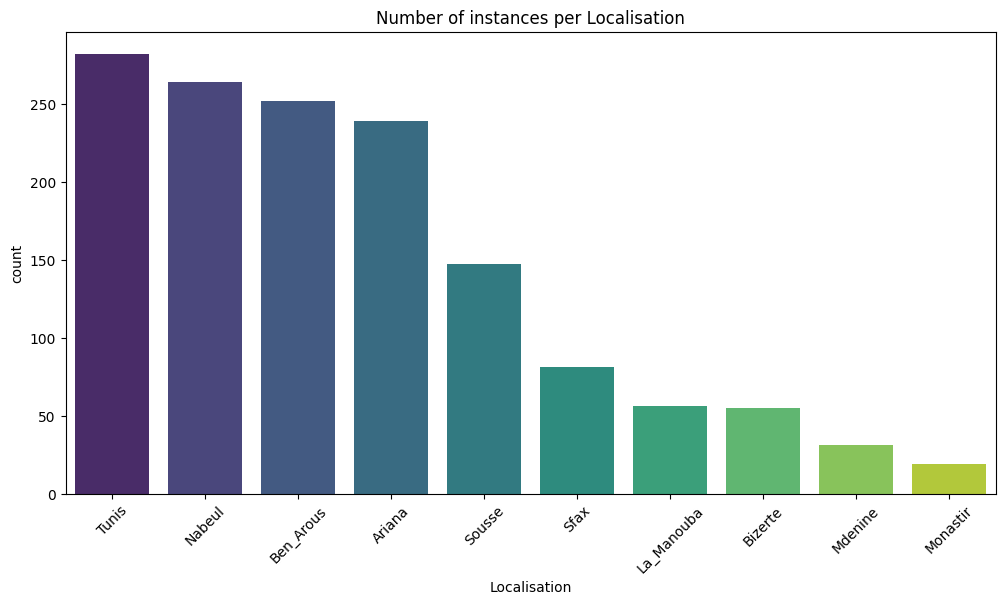

In [128]:
#Distribution des instances selon les localisation top 10 
plt.figure(figsize=(12, 6))
sns.countplot(x='Localisation', data=df, palette='viridis', order=df['Localisation'].value_counts().index[:10])
plt.title('Number of instances per Localisation')
plt.xticks(rotation=45)
plt.show()

C:\Users\amine\AppData\Local\Temp\ipykernel_9276\321777733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Nb_Salles De bain', data=df, palette='viridis')


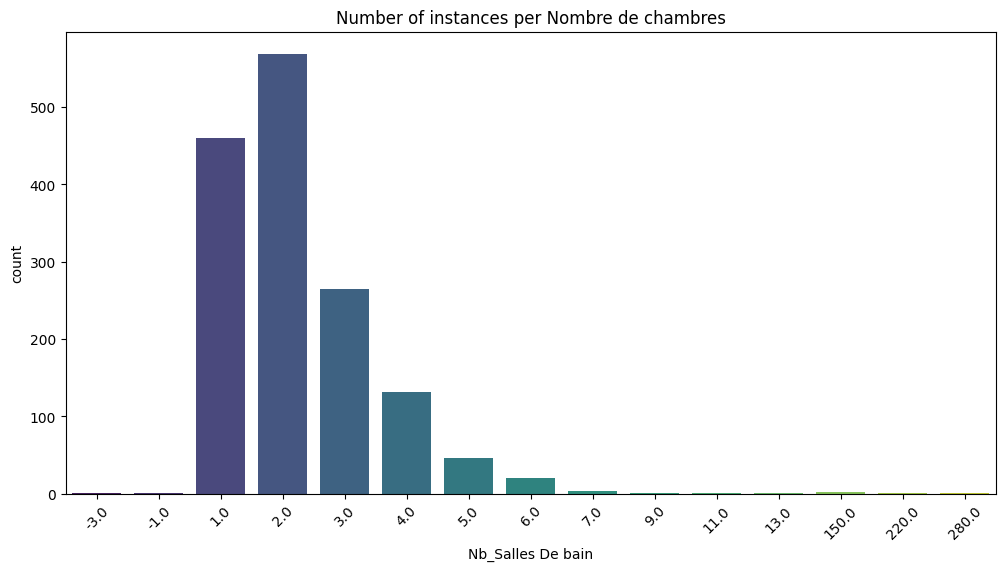

In [129]:
#Distribution des instances selon les nombre de chambres et nombre de salles de bain
plt.figure(figsize=(12, 6))
sns.countplot(x='Nb_Salles De bain', data=df, palette='viridis')
plt.title('Number of instances per Nombre de chambres')
plt.xticks(rotation=45)
plt.show()


In [139]:
# Quantile values for Superficie
superficie_quantiles = df['Superficie'].quantile([0.020, 0.5, 0.98])
print("Superficie Quantiles:")
print(superficie_quantiles)

# Quantile values for Nb_Chambres
nb_chambres_quantiles = df['Nb_Chambres'].quantile([0.0013, 0.5, 0.98])
print("Nb_Chambres Quantiles:")
print(nb_chambres_quantiles)

# Quantile values for Nb_Salles De bain
nb_salles_de_bain_quantiles = df['Nb_Salles De bain'].quantile([0.0013, 0.5, 0.98])
print("Nb_Salles De bain Quantiles:")
print(nb_salles_de_bain_quantiles)

Superficie Quantiles:
0.02      70.0
0.50     350.0
0.98    1492.8
Name: Superficie, dtype: float64
Nb_Chambres Quantiles:
0.0013     0.9052
0.5000     4.0000
0.9800    10.0000
Name: Nb_Chambres, dtype: float64
Nb_Salles De bain Quantiles:
0.0013    0.9052
0.5000    2.0000
0.9800    5.0000
Name: Nb_Salles De bain, dtype: float64


In [140]:
print("Number of rows before removing outliers:", df.shape[0])
df_cleaned = df[
    (df['Superficie'] >= superficie_quantiles[0.020]) & 
    (df['Superficie'] <= superficie_quantiles[0.98]) & 
    (df['Nb_Chambres'] >= nb_chambres_quantiles[0.0013]) & 
    (df['Nb_Chambres'] <= nb_chambres_quantiles[0.98]) & 
    (df['Nb_Salles De bain'] >= nb_salles_de_bain_quantiles[0.0013]) & 
    (df['Nb_Salles De bain'] <= nb_salles_de_bain_quantiles[0.98])
]

# Check the shape after filtering
print("Number of rows after removing outliers:", df_cleaned.shape[0])
# Optional: Save cleaned data to CSV
df_cleaned.to_csv('cleaned_tayara_with_quantile_filter.csv', index=False)

Number of rows before removing outliers: 1503
Number of rows after removing outliers: 1396


C:\Users\amine\AppData\Local\Temp\ipykernel_9276\1758060354.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Nb_Salles De bain', data=df1, palette='viridis')


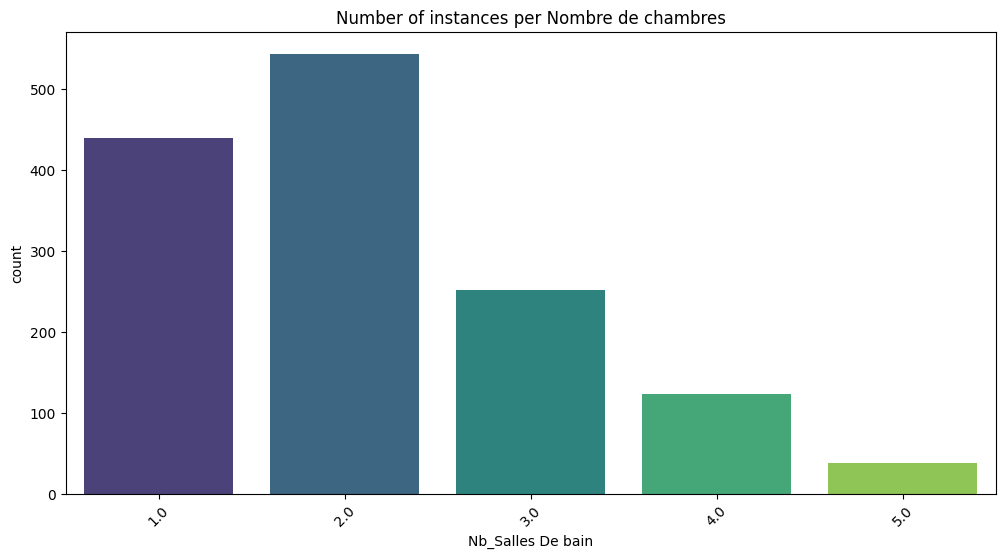

In [141]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Nb_Salles De bain', data=df_cleaned, palette='viridis')
plt.title('Number of instances per Nombre de chambres')
plt.xticks(rotation=45)
plt.show()

C:\Users\amine\AppData\Local\Temp\ipykernel_9276\3199739266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Nb_Chambres', data=df1, palette='viridis')


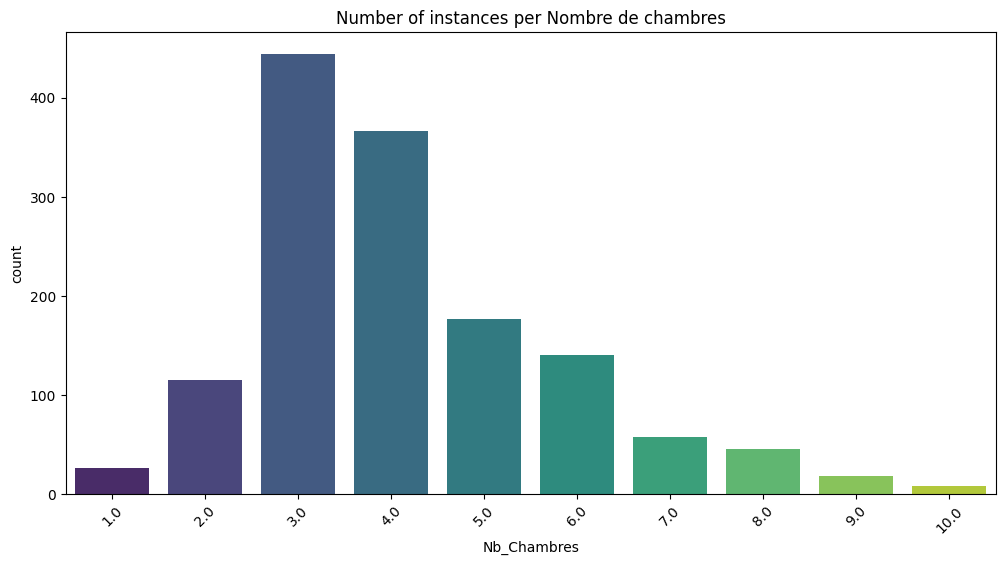

In [142]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Nb_Chambres', data=df1, palette='viridis')
plt.title('Number of instances per Nombre de chambres')
plt.xticks(rotation=45)
plt.show()

C:\Users\amine\AppData\Local\Temp\ipykernel_9276\1487786831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Superficie', data=df_cleaned, palette='viridis')


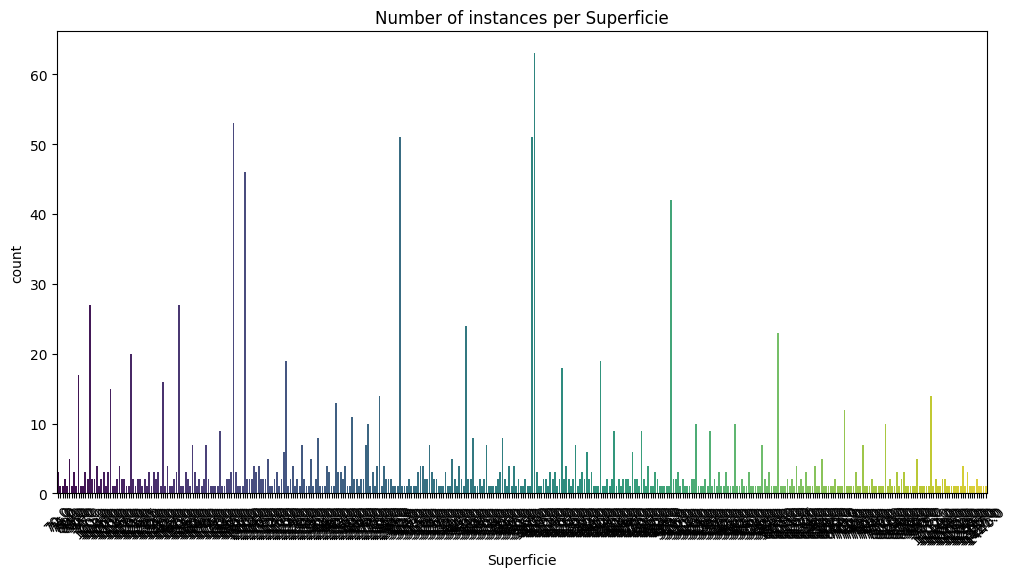

In [143]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Superficie', data=df_cleaned, palette='viridis')
plt.title('Number of instances per Superficie')
plt.xticks(rotation=45)
plt.show()

In [147]:
df = pd.read_csv('cleaned_tayara_with_quantile_filter.csv')

df = df.drop(['Nature', 'Région'],axis=1)

print(df.head())
#save the cleaned data
df.to_csv('cleaned_tayara_final.csv', index=False)


  Localisation Type de bien  Superficie  Nb_Salles De bain  Nb_Chambres  \
0       Ariana        villa       320.0                3.0          5.0   
1       Nabeul       Maison       197.0                1.0          2.0   
2   La_Manouba       Maison       300.0                1.0          3.0   
3       Ariana        villa       517.0                3.0          5.0   
4       Nabeul        villa       485.0                4.0          4.0   

           Prix  
0  5.300000e+05  
1  2.400000e+05  
2  1.929897e+05  
3  1.150000e+06  
4  8.900000e+05  


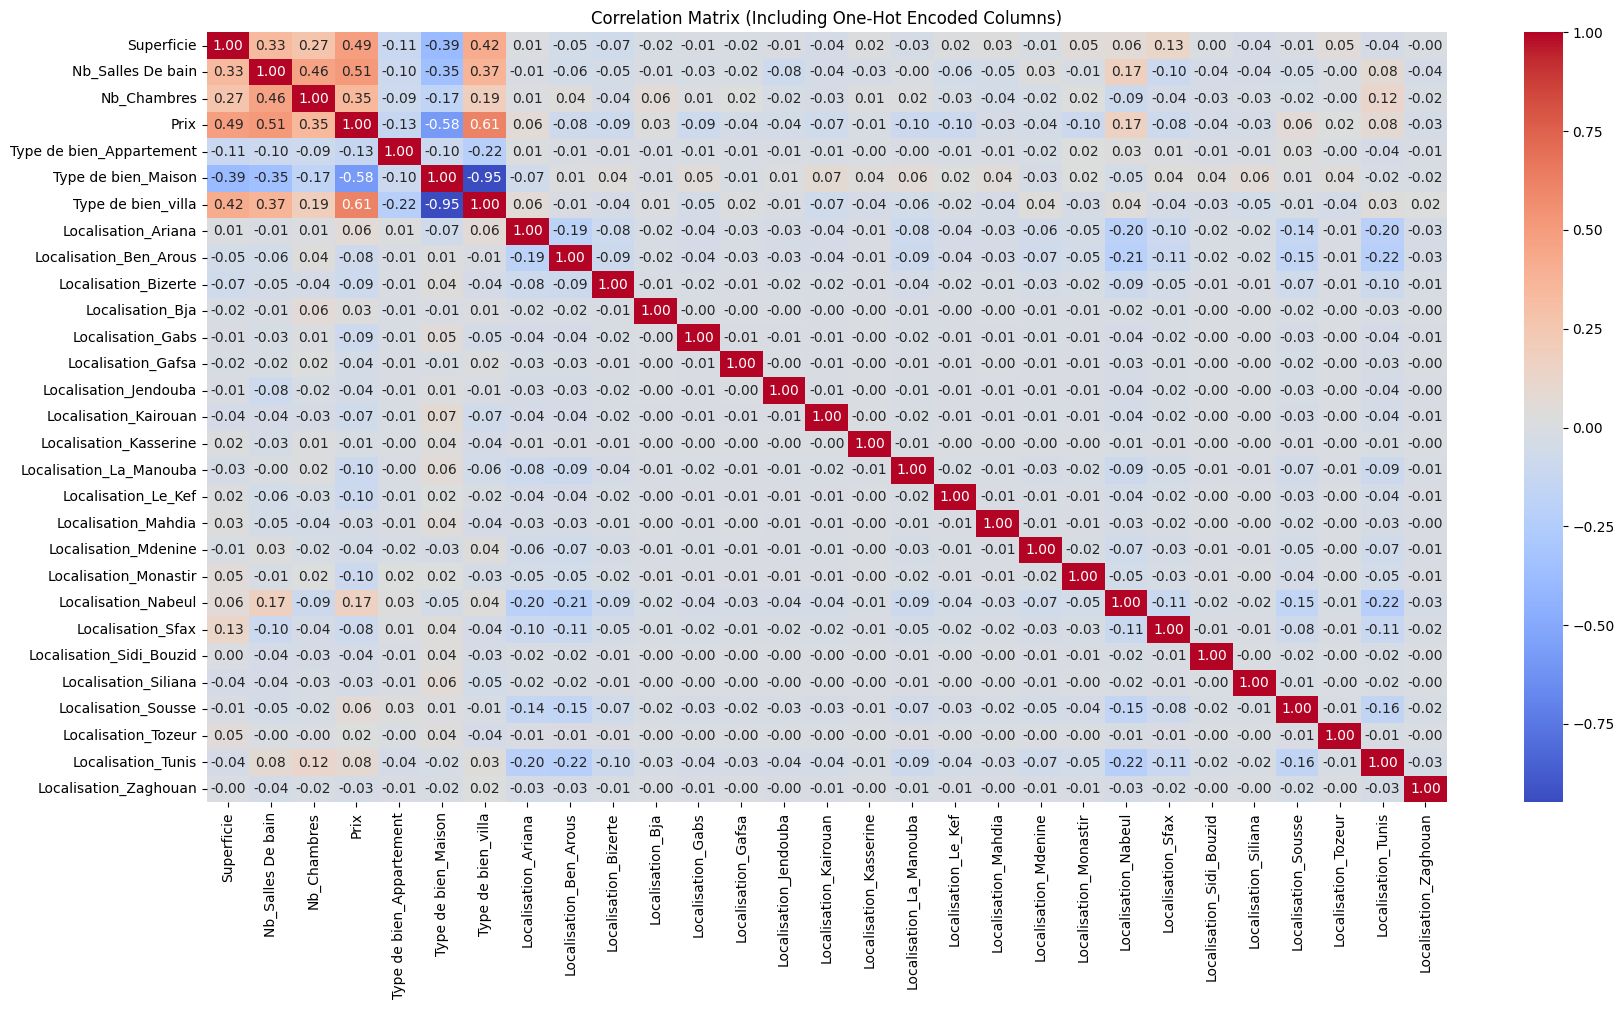

In [157]:
df_done = pd.read_csv('cleaned_tayara_final.csv')

# Step 1: Apply one-hot encoding to the categorical variables
df_encoded = pd.get_dummies(df_done, columns=['Type de bien', 'Localisation'])

# Convert boolean columns to integers (if applicable)
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include=['bool']).columns})


df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')


correlation_matrix = df_encoded.corr()

# Step 4: Plot the correlation matrix
plt.figure(figsize=(20, 10))  # Adjusted figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Including One-Hot Encoded Columns)')
plt.show()
